In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, Imputer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Reading data

In [2]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('cleveland.csv', names = features)
hungarianData = pd.read_csv('hungary.csv', names = features)
switzerlandData = pd.read_csv('switzerland.csv', names = features)

In [3]:
data = pd.concat([clivelandData,hungarianData,switzerlandData])

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
data=data.replace('?',np.NAN)

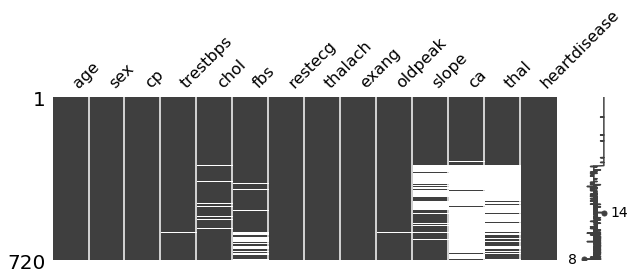

In [6]:
msno.matrix(data,figsize=(10,3))

In [7]:
data=data.drop(["ca", "slope", "thal"],axis=1)

### analysing distribution

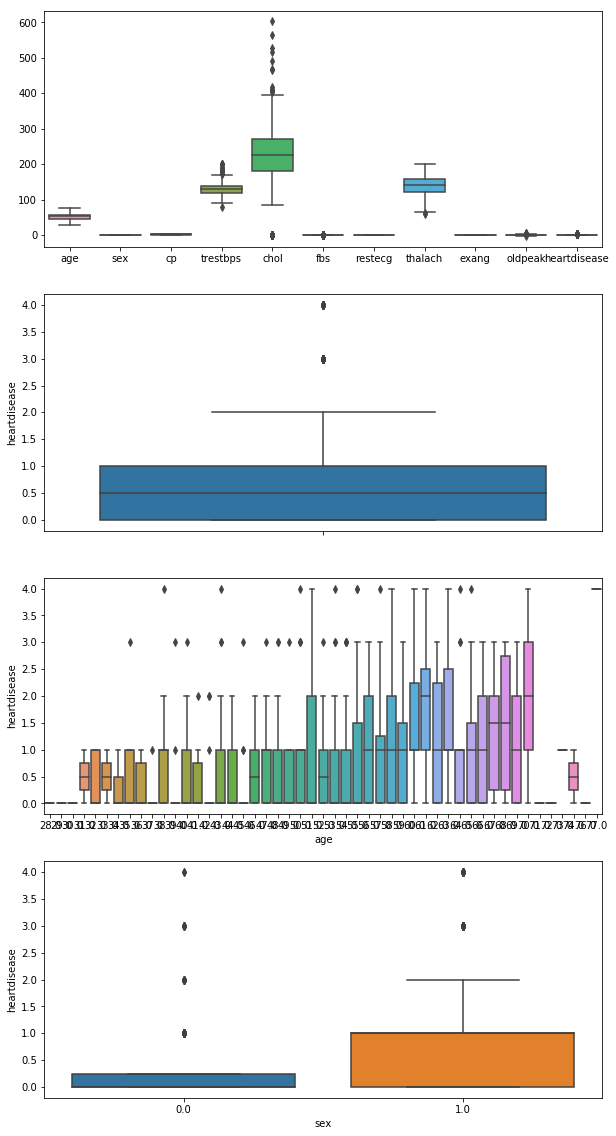

In [8]:
fig,axes=plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sns.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sns.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])

### Correlation analysis

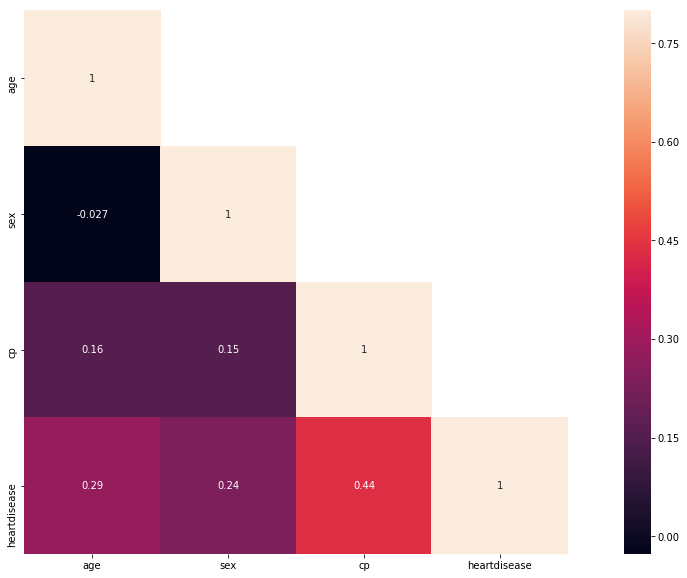

In [9]:
corr= data.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=0.8,square=True,annot=True)
#no feature affecting the result most

### Modeling

In [10]:
## impute missing data with imputer function
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputedData=imp.fit_transform(data)

In [11]:
#Creating train set and test set
X_train, X_test, y_train, y_test = train_test_split(imputedData[:, :-1], imputedData[:, -1], test_size=0.3, random_state=42)


In [12]:
#scale data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
#Build model
classifier=svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

# Accuracy of predictions
accuracy_score(y_test, preds)

0.6527777777777778